It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

In [17]:
# Download the data and save to a file called "housing.data."

import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve(data_url, 'housing.data')
# this saves a file called 'housing.data' locally'


('housing.data', <httplib.HTTPMessage instance at 0x105ebe518>)

In [30]:
# Reading in the local file 'housing.data'
import csv
data = []
with open('housing.data', 'rU') as f:
    reader = csv.reader(f )
    for row in reader:
        data.append(row)
f.close()



In [40]:
# the data provided was not separated by commas, but instead spaces and each row is currently formatted as a single string.
# because double whitespaces are present, specifying delimeter as ' ' does not work properly and  '  ' produces error.
data2 = []
for row in data:
    for string in row:
        #print string
        data2.append(string.split())
# created a new dataframe (list frame) using appending lists where a nested loop split the string using white space.

In [43]:
for row in data2:
    print row
# is kidna stinks that every number is a string, but that can be fixed when doing calculations.

['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00']
['0.02731', '0.00', '7.070', '0', '0.4690', '6.4210', '78.90', '4.9671', '2', '242.0', '17.80', '396.90', '9.14', '21.60']
['0.02729', '0.00', '7.070', '0', '0.4690', '7.1850', '61.10', '4.9671', '2', '242.0', '17.80', '392.83', '4.03', '34.70']
['0.03237', '0.00', '2.180', '0', '0.4580', '6.9980', '45.80', '6.0622', '3', '222.0', '18.70', '394.63', '2.94', '33.40']
['0.06905', '0.00', '2.180', '0', '0.4580', '7.1470', '54.20', '6.0622', '3', '222.0', '18.70', '396.90', '5.33', '36.20']
['0.02985', '0.00', '2.180', '0', '0.4580', '6.4300', '58.70', '6.0622', '3', '222.0', '18.70', '394.12', '5.21', '28.70']
['0.08829', '12.50', '7.870', '0', '0.5240', '6.0120', '66.60', '5.5605', '5', '311.0', '15.20', '395.60', '12.43', '22.90']
['0.14455', '12.50', '7.870', '0', '0.5240', '6.1720', '96.10', '5.9505', '5', '311.0', '15.20', '396.90', '19.15', '27.10']
['0.21124',

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [44]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

1. CRIM      - per capita crime rate by town
2. ZN        - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     - proportion of non-retail business acres per town
4. CHAS      - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       - nitric oxides concentration (parts per 10 million)
6. RM        - average number of rooms per dwelling
7. AGE       - proportion of owner-occupied units built prior to 1940
8. DIS       - weighted distances to five Boston employment centres
9. RAD       - index of accessibility to radial highways
10. TAX      - full-value property-tax rate per 10,000 dollars. 
11. PTRATIO  - pupil-teacher ratio by town
12. B        - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    - Percent lower status of the population
14. MEDV     - Median value of owner-occupied homes in $1000's

In [45]:

#Probably the best way to accomplish this (without pandas) will be using a dictionary.
house_data={}

# "Borrowed" this formula from Ike.
for i in range (0,len(names)):
    templist = [float(item[i]) for item in data2]
    house_data[names[i]] = templist


Load the data in through any method you choose. Make sure to include the column names so that you may conduct your analysis more easily.

Exercise 1: Conduct a brief integrity check of your data. This integrity check should include,
but is not limited to, checking for missing values and making sure all values make logical
sense. (i.e. Is one variable a percentage, but there are observations above 100%?) Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

##### Checking dictionary for uneven number of feature observations.

In [59]:
# printing how many features we should have
print len(names)

# printing how many features we do have (keys)
print len(house_data.keys())

# prints the lengths of all the value lists in the dictionary
for item in house_data.values():
    print len(item)

14
14
506
506
506
506
506
506
506
506
506
506
506
506
506
506


##### Checking for features with improperly recorded observations.
Given the information about the features and observing a few of their observations I believe there are 7 features which take place on a normalized scale (0-1 or 0-100)

- CHAS (0-1),
- CRIM(0-100),
- ZN(0-100), 
- INDUS(0-100), 
- RM(0-100), 
- LSTAT(0-100), 
- PTRATIO(0-100)

In [69]:
max_one = ['CHAS']
max_hund = ['ZN','INDUS','RM','LSTAT','PTRATIO', 'CRIM']

In [70]:
for feature in max_one:
    for observation in house_data[feature]:
        if observation > 1:
            print 'Abnormal Value found in ', feature, 'with value of', observation
# Returned nothing so it found nothing wrong

In [71]:
for feature in max_hund:
    for observation in house_data[feature]:
        if observation > 100:
            print 'Abnormal Value found in ', feature, 'with value of', observation
# Also returned no values

Does not look like there are any out of scope values.

If there were some issues with data type such as a string where there should have been a number, the function to create a dictionary would have failed when it tried to convert a string to a float.

### Exercise 2: For what two attributes does it make the *least* sense to calculate mean and median? Why?

### Exercise 3: 
Which two variables have the strongest linear association? Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

In [ ]:
import numpy as np

list_of_corr = []

for feature1 in names:
    for feature2 in names:
        x = np.corrcoef(house_data[feature1], house_data[feature2])
        #np.corrcoef returns a numpy array that must be sliced to get the Correlation value
        list_of_corr.append([x[1,0], feature1,feature2])
        # appending the Correlations coeficient with the feature names to a list.

In [93]:
# Iterating through list to find very strong correlations
for sub in list_of_corr:
    if sub[0] >0.9:
        #Nested for loop from earlier performed on every iteration which includes same feature pairs
        # this if will not print those features that are correlations of 2 of the same features.
        if sub[1] != sub[2]:
            print 'HIGH!',sub
    if sub[0] <-0.9:
        if sub[1] != sub[2]:
            print 'low', sub

HIGH! [0.91022818853318455, 'RAD', 'TAX']
HIGH! [0.91022818853318455, 'TAX', 'RAD']


Radiation and Taxes are very highly correlated!!

Exercise 4: Which variable has the most symmetric distribution? Which variable has the most left-skewed (negatively skewed) distribution? Which variable has the most right-skewed (positively skewed) distribution? (Do not scale for this exercise.) Defend your method for determining these variables.

In [94]:
import matplotlib.pyplot as plt
% matplotlib inline

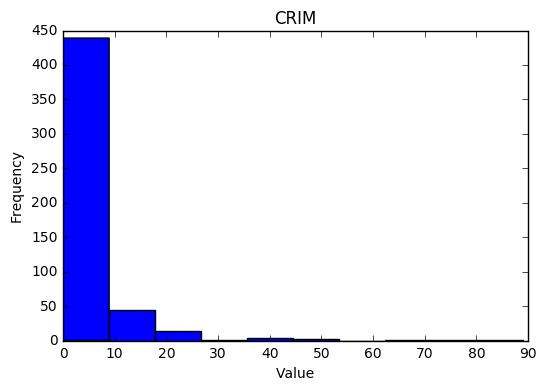

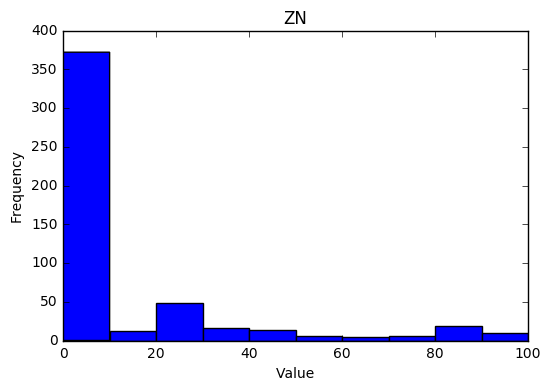

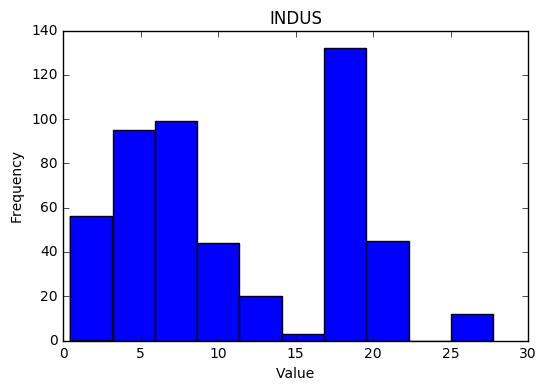

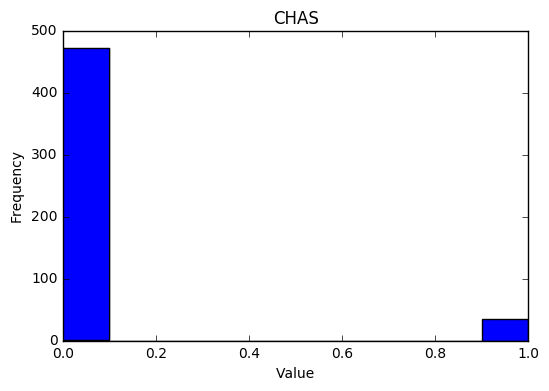

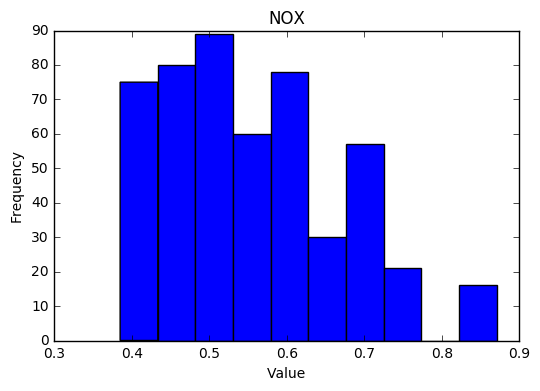

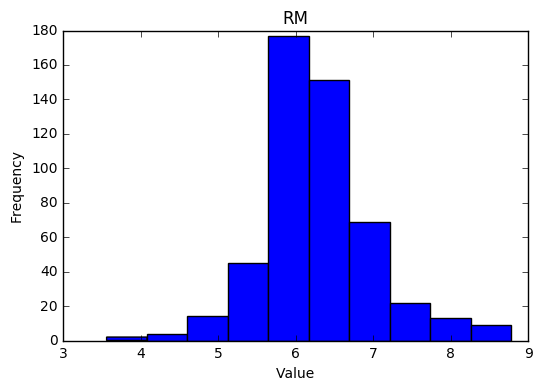

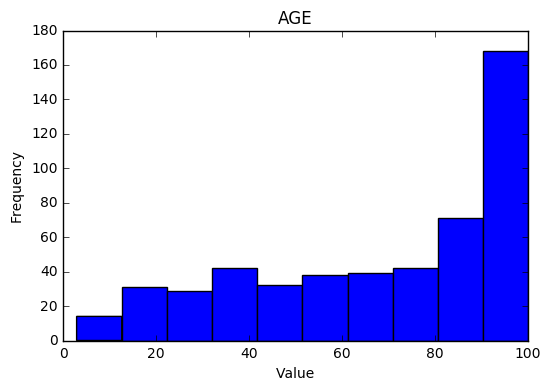

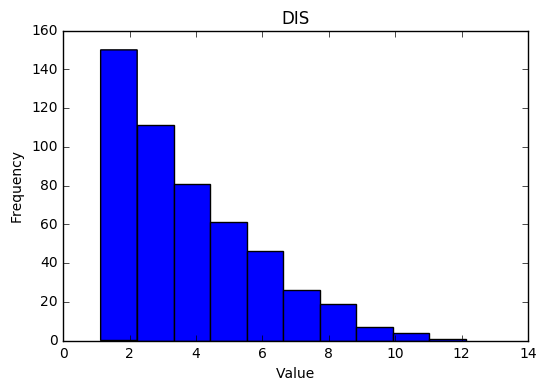

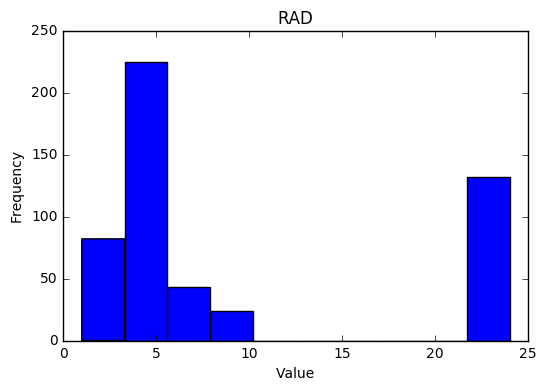

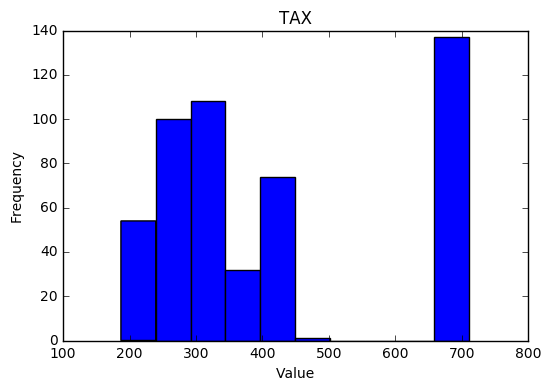

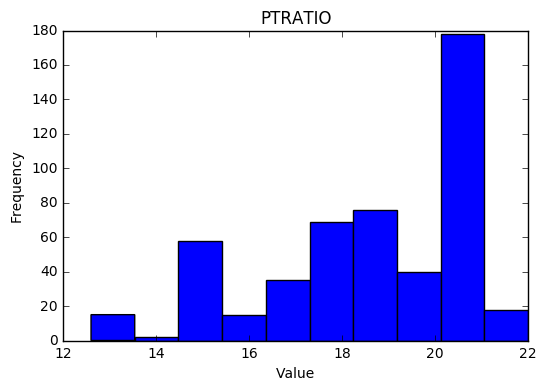

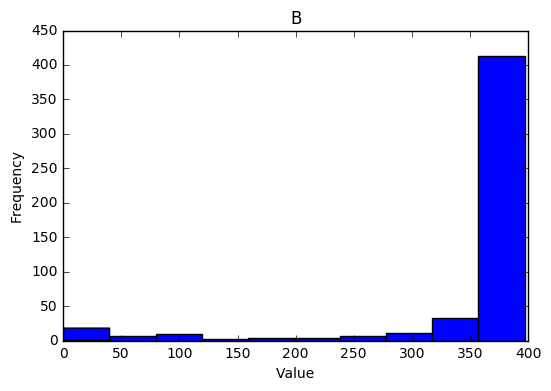

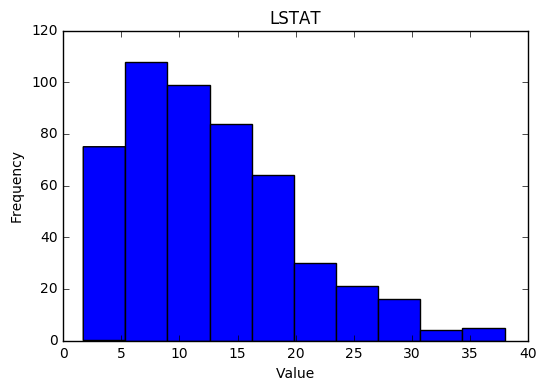

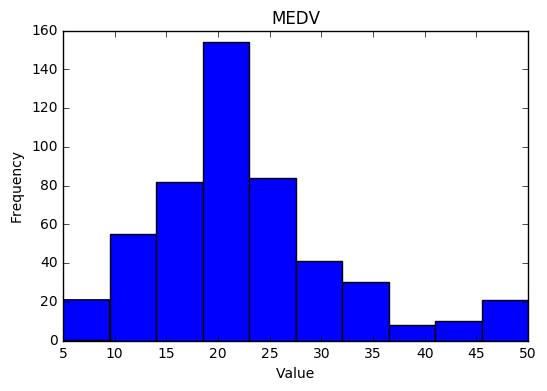

In [99]:
for feature in names:
    plt.hist(house_data[feature])
    plt.title(feature)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

- Normal Distribution - MEDV
- Negatively Skewed (left skew)  -  AGE, B
- Positive Skewed (right skew) -  DIS, LSTAT 

In [139]:
stats.skew(house_data['CRIM'])

5.207652387859715

Exercise 5: As you may have noticed, the spread of the distribution contributed significantly to the numbers that helped you to answer Exercise 4. Repeat Exercise 4, but scale your results by the range of that variable.

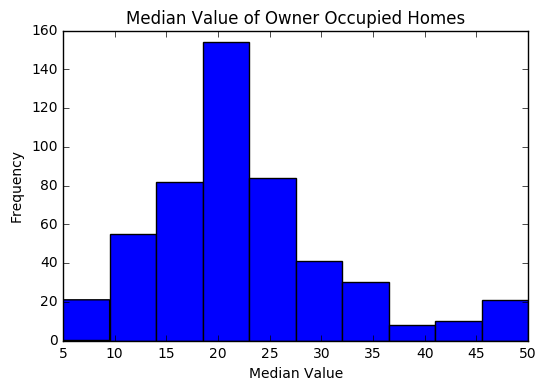

In [103]:
medv_data = house_data['MEDV']

medv_range = np.ptp(medv_data)
#Peak to Peak

scaled_medv =[]

for item in medv_data:
    scaled_medv.append(item/medv_range)
    
plt.hist(house_data[feature])
plt.title('Median Value of Owner Occupied Homes')
plt.xlabel("Median Value")
plt.ylabel("Frequency")
plt.show()

# It shows the same thing because Scaling doesn't Affect Distribution!

### Exercise 6: 
Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics. If you feel there is additional information that is relevant, include it. 

In [106]:
# Im going to use MEAN, MEDIAN and RANGE

def univariatizer(data):
    print 'mean', np.mean(data)
    print 'Median', np.median(data)
    print 'Range', np.ptp(data)
    
select_features = ['MEDV', 'CHAS', 'TAX', 'RAD']

In [109]:
for item in select_features:
    print item
    #data = house_data[]
    univariatizer(house_data[item])
    print #print nothing, its a space

MEDV
mean 22.5328063241
Median 21.2
Range 45.0

CHAS
mean 0.0691699604743
Median 0.0
Range 1.0

TAX
mean 408.23715415
Median 330.0
Range 524.0

RAD
mean 9.54940711462
Median 5.0
Range 23.0



### Exercise 7: 
Exercises 3 through 6 have used inferential statistics, descriptive statistics, or both. For each exercise, identify the branch of statistics on which you relied for your answer.

In [13]:
# YOUR ANSWER HERE!!!

### Exercise 8: 
It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. Set the seed equal to the sum of the first ten rows of 'RAD' and use the random.sample() function to select 50 observations. Find the mean of the 'AGE' of these observations. ([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [116]:
from numpy import random
# Taking the sum of the first 10 rows of the RAD data
sum(house_data['RAD'][:10])    

# 34 will be our random state

34.0

In [124]:
# set seed for random sample
random.seed([34])

sample = []
# while our sample list is less than 50 observations
while len(sample) < 50:
    
    # getting a random index values between 0 and 506
    rando = random.randint(0,len(data2))
    
    # setting a temporary list to hold the indexed values
    r_s = []
    
    # for each feature name in the dictionary
    for row in names:
        
        #append the temp list with the random index across all features
        r_s.append(house_data[row][rando])
        
    # append the temp list to the Random Sample
    sample.append(r_s)
    
    # Rinse and repeat

In [126]:
#Age has the 6th index and i dont feel like converting back to a dictionary for this.
total = 0
for obs in sample:
    total += obs[6]
total/len(sample)

69.526

### Exercise 9:
In Exercise 8, identify the type of sampling used.

Simple!  Random Sample

BONUS: Of the remaining types of sampling about which we learned, describe (but do not execute) how you might implement at least one of these types of sampling.

- Simple Random Sampling - Accomplished with random library
- Stratified Sampling - Random Sample using the Standard Deviation and associated likliness using a single feature.
- Cluster Sampling - first divide population into like 50 clusters then randomly take 5 of those clusters.
- Systematic Sampling - Take every 10th observation


# Stats-Intro-Part-2-Lab

Exercise 1: Find the mean, standard deviation, and the standard error of the mean for variable 'AGE.'

In [130]:
import scipy
from scipy import stats

print 'Mean', np.mean(house_data['AGE'])
print 'Standard Deviation', np.std(house_data['AGE'])
print 'Standard Error',scipy.stats.sem(house_data['AGE'])

Mean 68.5749011858
Standard Deviation 28.1210325702
Standard Error 1.25136952526


### Exercise 2: 
Generate a 90%, 95%, and 99% confidence interval for 'AGE'. Do at least one of these manually (i.e. by plugging in the appropriate parts) and at least one of these using a function from scipy.stats. Interpret the results from all three confidence intervals.


In [135]:
mean = np.mean(house_data['AGE'])
std = np.std(house_data['AGE'])

ninety = stats.norm.interval(0.9, loc=mean, scale=std)
ninety_five = stats.norm.interval(0.95, loc=mean, scale=std)
ninety_nine = stats.norm.interval(0.99, loc=mean, scale=std)


print 'Range of 90% confidence', ninety
print 'Range of 95% confidence', ninety_five
print 'Range of 99% confidence', ninety_nine


Range of 90% confidence (22.319918768996146, 114.82988360254535)
Range of 95% confidence (13.458690140028665, 123.69111223151285)
Range of 99% confidence (-3.8600785546984184, 141.00988092623993)


### Exercise 3: Did you assume/ use the central limits theorm (or something like that, i accidently deleted it)

No, because my confident functions do not continually sample in order to draw their conclussion, im pretty sure this method called just assumes that the data is normally distributed.


### Exercise 4: 
For variable 'NOX', generate a 95% confidence interval and interpret it.


In [136]:
mu = np.mean(house_data['NOX'])
sigma = np.std(house_data['NOX'])

stats.norm.interval(0.95, loc=mu, scale=sigma)

(0.32780352235352345, 0.78158659622355176)

I am ninety-five percent confident that the true distribution of that data falls between the range of 0.3278 and 0.7815.

That being said, if we were to take a random sample of 100 observations from the house_data set 95/100 would fall between 0.3278 and 0.7815.

Exercise 5: For the variable 'NOX', find the median.


In [131]:
print 'NOX Median', np.median(house_data['NOX'])

NOX Median 0.538


Exercise 6: For the variable 'NOX', test the hypothesis that the mean is equal to the median. You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.


Exercise 7: What do you notice about the results from Exercise 4 and Exercise 6? If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.


Exercise 8: For the variable 'NOX', test the hypothesis that the mean is greater than or equal to the median. You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.
